In [22]:
# Import required libraries

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

In [23]:
# Load the dataset

crops = pd.read_csv("soil_measures.csv")

In [24]:
# Perform data checks - overview of the data

crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [25]:
# Perform data checks - check for missing values

crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [26]:
# Perform data checks - verify that data in columns to be used as features ('N', 'P', 'K', 'ph') is numeric

crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [27]:
# Perform data checks - check unique values in column to be used as target variable ('crop')

crops["crop"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [28]:
# Split the data into training and test sets, setting test_size equal to 20% and using a random_state of 123

X = crops.drop("crop", axis=1)
y = crops["crop"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Predict crop using a Logistic Regression model and calculate F1 score (model accuracy) for each individual feature

features = ["N", "P", "K", "ph"]

for feature in features:
    # Set max_iter to 4000 so the model can converge and multi_class to multinomial as there are more than 2 possible crops
    log_reg = LogisticRegression(max_iter=4000, multi_class="multinomial")
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    feature_performance = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {feature_performance}")

F1-score for N: 0.10389867856018971
F1-score for P: 0.11362847510488353
F1-score for K: 0.20349279438334908
F1-score for ph: 0.04532731061152114


<AxesSubplot:>

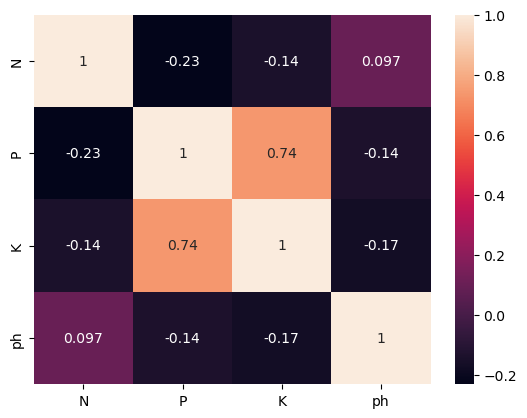

In [29]:
# Perform a correlation analysis for each pair of features to discard features that are highly correlated

correlation = crops.corr()
sns.heatmap(correlation, annot=True)

In [43]:
# Discard feature 'N' and build a new Logistic Regression model

final_features = ["N", "K", "ph"]
X = crops[final_features]
y = crops["crop"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

log_reg = LogisticRegression(max_iter=4000, multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [44]:
# Measure the performance of the new model, using the weighted average as crop categories are imbalanced

model_performance = f1_score(y_pred, y_test, average="weighted")